**Q.1 Support Vector Machine:**

Data and other details are available at

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

Use the weblink and reproduce the result for SVM.

   1.Implement SVM to classify the type of iris flower based on its sepal length and width using the iris dataset?

   2.Also try to use the scikit-learn digits dataset and an SVM to classify handwritten digits?
For both datasets, provide a step-by-step code, including:  

   1.Loading the dataset

   2.Visualizing the data

   3.Splitting the data into training and testing sets

   4.Initializing and training the SVM model

   5.Testing the model

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.70      0.54      0.61        13
           2       0.62      0.77      0.69        13

    accuracy                           0.80        45
   macro avg       0.78      0.77      0.77        45
weighted avg       0.81      0.80      0.80        45



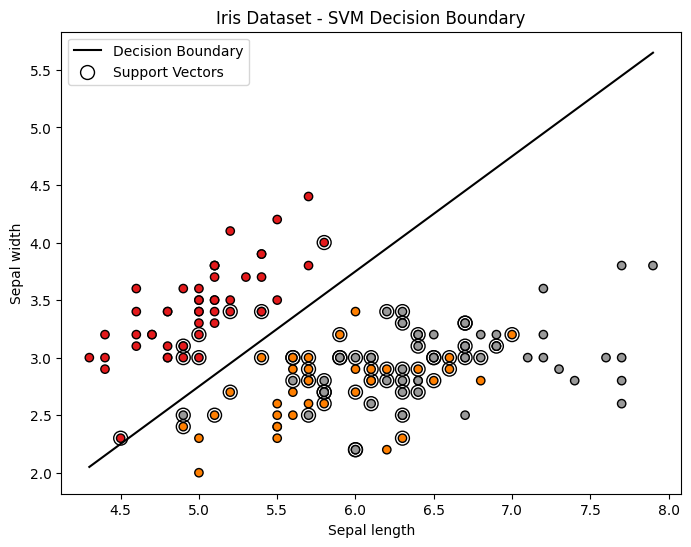

In [ ]:
#iris flower data set
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Considering only the first two features (sepal length and width)
y = iris.target

# Data split  into training and testing  data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# The SVM model train
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)

# The SVM model testing
y_pred = svm_model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot the decision boundary for SVM
w = svm_model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]))
yy = a * xx - (svm_model.intercept_[0]) / w[1]

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
plt.plot(xx, yy, 'k-', label='Decision Boundary')

# Plotting support vectors
plt.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k', label='Support Vectors')

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Iris Dataset - SVM Decision Boundary')
plt.legend()
plt.show()


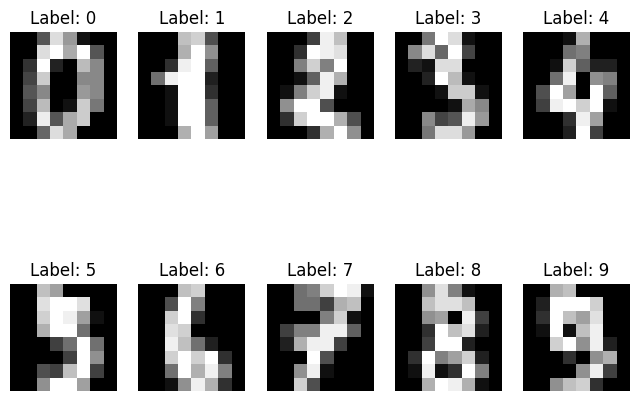

Accuracy: 0.987037037037037


In [ ]:
#scikit-learn digits dataset
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the digits dataset
digits = datasets.load_digits()
X = digits.data
y = digits.target

# Visualize some of the digits
plt.figure(figsize=(8, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i].reshape(8, 8), cmap='gray')
    plt.title(f'Label: {y[i]}')
    plt.axis('off')
plt.show()

# Data split  into training and testing  data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the SVM model
svm_model = SVC(kernel='rbf')  # RBF kernel is commonly used for SVM with digits dataset
svm_model.fit(X_train, y_train)

# Testing the model
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


**2. Principal Component Analysis:**

  1.To do PCA, use the Eigen decomposition available in numpy. The dataset can be obtained from https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_3d.html#sphx-glr-auto-examples-decomposition-plot-pca-3d-py.
  
  2.DO NOT USE the code available for PCA in the same link (as mentioned above, use numpy's Eigen decomposition).
  
  3.Compare your results with the one available in the link (here, you are free to use the code available in the link to generate any numbers for comparison).
  
  4.Are you getting the same result?


Top three eigenvalues: [2.93808505 0.9201649  0.14774182]
Top three eigenvectors:
[ 0.52106591 -0.26934744  0.5804131   0.56485654]
[-0.37741762 -0.92329566 -0.02449161 -0.06694199]
[-0.71956635  0.24438178  0.14212637  0.63427274]


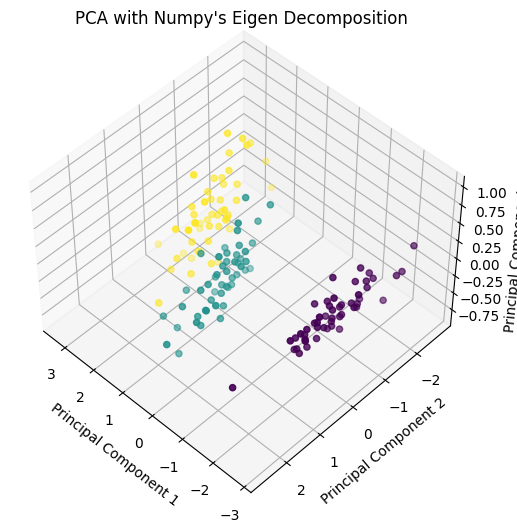

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

# Load the iris dataset
iris = load_iris()
X = iris.data

# Center the data
X_meaned = (X - np.mean(X, axis=0))/np.std(X, axis=0)

# Compute the covariance matrix
cov_matrix = np.cov(X_meaned, rowvar=False)

# Perform Eigen decomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Print the top three eigenvalues
print("Top three eigenvalues:", eigenvalues[:3])

# Print the top three eigenvectors
print("Top three eigenvectors:")
for i in range(3):
    print(eigenvectors[:, i])


# Project the data onto the new feature space using numpy's result
transformed_data_numpy = np.dot(X_meaned, eigenvectors[:, :3])

# Plot the data after PCA using numpy
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d', elev=48, azim=134)
ax.scatter(transformed_data_numpy[:, 0], transformed_data_numpy[:, 1], transformed_data_numpy[:, 2], c=iris.target)
ax.set_title("PCA with Numpy's Eigen Decomposition")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
plt.show()




Top three eigenvalues: [2.93808505 0.9201649  0.14774182]
Top three eigenvectors:
[ 0.52106591 -0.26934744  0.5804131   0.56485654]
[0.37741762 0.92329566 0.02449161 0.06694199]
[-0.71956635  0.24438178  0.14212637  0.63427274]


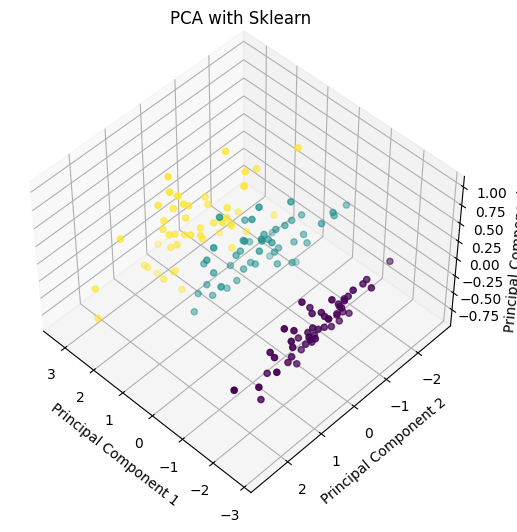

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Required for 3D plotting
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

# Load the iris dataset
iris = load_iris()
X = iris.data

# Center and scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize PCA with 3 components
pca = PCA(n_components=3)

# Fit PCA on the scaled data
pca.fit(X_scaled)

# Print the top three eigenvalues
print("Top three eigenvalues:", pca.explained_variance_)

# Print the top three eigenvectors
print("Top three eigenvectors:")
for i in range(3):
    print(pca.components_[i])

# Project the data onto the new feature space using sklearn's result
transformed_data_sklearn = pca.transform(X_scaled)

# Plot the data after PCA using sklearn
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d', elev=48, azim=134 )
ax.scatter(transformed_data_sklearn[:, 0], transformed_data_sklearn[:, 1], transformed_data_sklearn[:, 2], c=iris.target)
ax.set_title("PCA with Sklearn")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
plt.show()
